# NumPy


The numpy array object



* Load and inspect a 1D wireline log.
* **Exercise:** compare list iteration to vectorized math.
* Load and inspect a 2D seismic section from Numpy binary.
* **Exercise:** plotting raster data with imshow.
* Load and inspect a 3D seismic volume from Numpy binary.
* Indexing into the cube, computing trace statistics.
* Visualize traces, sections, and timeslices.
* **Exercise:** load and visualize a seismic horizon.

<img src="images/L30_screenshot.png"></img>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [7]:
# Load and inspect a 1D wireline log.

# The LAS file 'data/L-30.las' there are 52 lines of `header` information. 
# Line 53 has a mnemonic for each column
# Use np.loadtxt()

In [8]:
lasfile = 'data/L-30.las'
num_headerlines = 53
data = np.loadtxt(lasfile, skiprows=num_headerlines)

In [9]:
type(data)

numpy.ndarray

In [10]:
x = np.linspace(0,99,100)
np.clip(x,20,80)

array([ 20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,
        80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,
        80.])

Let's plot some columns of the data to see what we're dealing with

Let's look at the first column

In [11]:
data[0,:] # first row

array([ 1140.,  -999.,  -999.,  1140.,  -999.,  -999.,  -999.,  -999.,
        -999.,  -999.,  -999.,  -999.,  -999.,  -999.,  -999.])

In [12]:
data[:,0] # first column

array([  1140. ,   1140.5,   1141. , ...,  13949. ,  13949.5,  13950. ])

Let's look at the second column


In [13]:
data[10000:10010,1]

array([ 12.415,  12.429,  12.443,  12.457,  12.471,  12.485,  12.5  ,
        12.468,  12.434,  12.401])

How many columns does this array have?

In [14]:
n = 14
data[:,n]

array([-999.   , -999.   , -999.   , ...,  -72.018,  -72.138,  -74.38 ])

In [15]:

column_names = {'DEPTH':0,'CALD':1,'CALS':2,'DEPTH':3,'DRHO':4,'DT':5, 
                'GRD':6, 'GRS':7, 'ILD':8, 'ILM':9, 'LL8':10, 'NPHILS':11,
                'NPHISS':121,'RHOB':13,'SP':14}

In [16]:
column_names

{'CALD': 1,
 'CALS': 2,
 'DEPTH': 3,
 'DRHO': 4,
 'DT': 5,
 'GRD': 6,
 'GRS': 7,
 'ILD': 8,
 'ILM': 9,
 'LL8': 10,
 'NPHILS': 11,
 'NPHISS': 121,
 'RHOB': 13,
 'SP': 14}

In [17]:
column_names['SP']

14

In [18]:
data[:,column_names['ILD']]

array([-999.   , -999.   , -999.   , ...,    5.857,    5.904,    5.953])

----
<div class="alert alert-success">
    <b>Exercise</b>:
    <ul>
      <p>
      a) How many samples are in the density log?  # np.shape, np.size
      </p>
      <p>
      b) What is the sample interval of the density log?
      </p>
      <p>
      c) What's wrong with this log? # slicing (same as lists!)
      </p>
      <p>
      d) show the density log from depth 4000 ft to 6000 ft # using fancy indexing
      </p>
      <p>
      e) use np.nan to remove values
      </p>
      <p>
      f) make a plot of density vs depth
      </p>
    </ul>
    
</div>


In [19]:
# Part a
rhob = data[:,column_names['RHOB']]
len(rhob)

25621

In [20]:
# Part a)


In [28]:
# Part b) here,
depth =  data[:,column_names['DEPTH']]
dz = depth[1] - depth[0]
dz2 = depth[2] - depth[1]
lowers = depth[1:]
uppers = depth[:-1]

deltas = lowers - uppers
set(deltas)

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [29]:
dz

nan

In [30]:
# Part c) here,
# What's wrong with this log?

data[data[:,column_names['RHOB']] == -999.000] = np.nan

In [31]:
rhob[rhob == -999.00] = np.nan

In [32]:
# Part d) here
depth_slice = depth[(depth >= 4000.0) & (depth < 6000.0 + dz)]

In [33]:
# Part e)
rhob = data[:,column_names['RHOB']]
rhob[rhob==-999.000] = np.nan
rhob = data[:,column_names['RHOB']]
rhob_slice = np.argwhere( (depth >= 4000.0) & (depth < 6000.0 + dz))

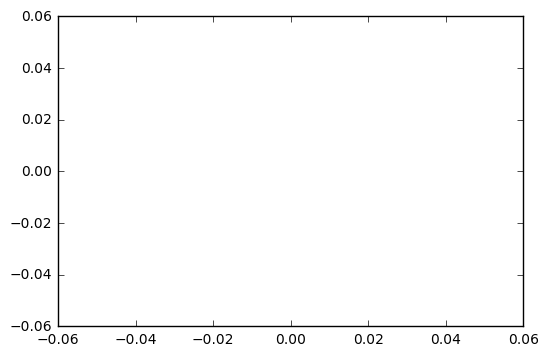

In [34]:
plt.plot(rhob[rhob_slice], depth_slice)

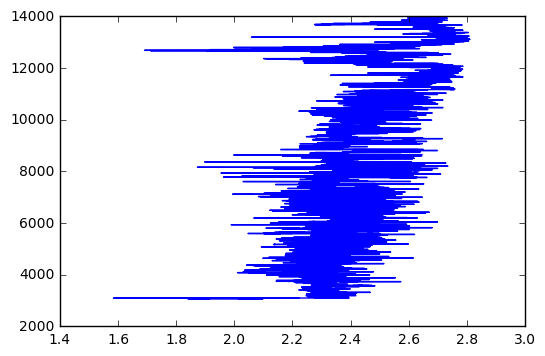

In [35]:
plt.plot(rhob, depth)

In [36]:
# Part f)
# plt.plot(rhob[rhob_slice], depth[rhob_slice])

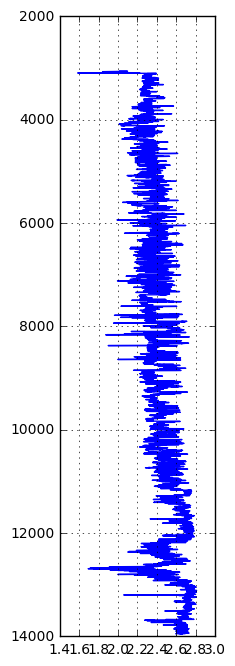

In [37]:
plt.figure(figsize=(2,8))
plt.plot(rhob, data[:,column_names['DEPTH']], 'b')
plt.gca().invert_yaxis()
plt.grid()

----
<div class="alert alert-success">
    <b>Exercise</b>:
    <ul>
      <p>
      a) Convert `depth` (ft) to `depth` in (m)
      </p>
      <p>
      b) Write a function called `smooth` that smoothes an arbitrary log using a simple boxcar filter of length `box_len`. (np.convolve)
      </p>
      <p>
      c) Compute a smoothed density log and then use it to calculate the lithostatic pressure (GPa) at the bottom of the well. Assume the density from the surface (0 m) down to the first log value it 2.25 g/cm3
      </p>
      <p>
      d) Make a plot of this curve. Label the axis, and give it a title. 
      </p>
      <p>
      e) Compute reflection coefficients (from impedance) using fancy indexing (numpy.diff and stagger demoninator)
      <p>

In [38]:
# Do part a) here

In [39]:
data = np.loadtxt(lasfile, skiprows=num_headerlines)

In [40]:
depth_m = depth * (1/3.2808)
depth_m

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [41]:
# Do part b) here 

# smooth the log
def smooth(y, box_len=10):
    box = np.ones(box_len)/box_len
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


In [42]:
depth_m = data[:,column_names['DEPTH']] / 3.2808

In [43]:
my_smoothed_rhob = smooth(rhob,100)

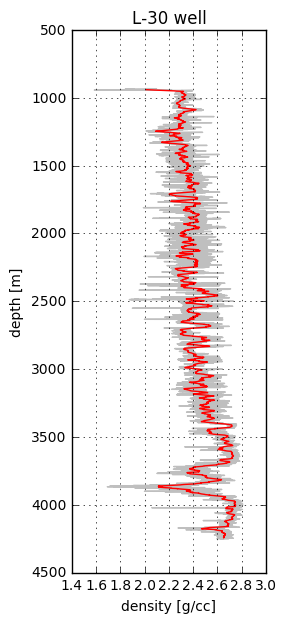

In [44]:
plt.figure(figsize=(2.5,7))

plt.plot(rhob, depth_m, 'k',alpha=0.25)

plt.plot(my_smoothed_rhob, depth_m, 'r')

plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('density [g/cc]')
plt.title('L-30 well')
plt.grid()

In [45]:
top_of_log = depth_m[0]
top_of_log

347.47622531089974

In [46]:
def convert_to_SI(rhob):
    return rhob*1000

In [47]:
top_den = 2.25
top_pressure =  convert_to_SI(top_den) * 9.81 * depth_m[0]  # Rho * g * z
top_pressure / 1e6

7.6696689831748346

In [48]:
deltaz = depth_m[-1] - depth_m[0]
deltaz

3904.535479151426

In [49]:
smooth(rhob)

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [50]:
# Do part c)

pressure = top_pressure + np.nancumsum(smooth(rhob)) * 9.81 * deltaz * 0.1524

In [51]:
print('The pressure at the bottom of the well is', pressure[-1]/1e6, 'MPa')

The pressure at the bottom of the well is 317.360060308 MPa


In [52]:
pressure

array([  7.66966898e+06,   7.66966898e+06,   7.66966898e+06, ...,
         3.17360060e+08,   3.17360060e+08,   3.17360060e+08])

In [53]:
a = np.array([1,1,1,np.nan,1,np.nan,1])

In [54]:
a

array([  1.,   1.,   1.,  nan,   1.,  nan,   1.])

In [55]:
b = np.nan_to_num(a)

In [56]:
np.cumsum(b)

array([ 1.,  2.,  3.,  3.,  4.,  4.,  5.])

In [57]:
np.nancumsum(b)

array([ 1.,  2.,  3.,  3.,  4.,  4.,  5.])

In [58]:
# Do part d)

In [59]:
rhob = data[:,column_names['RHOB']]
rhob[rhob == -999.00] = np.nan
depth = data[:,column_names['DEPTH']]
sonic = data[:, column_names['DT']]


In [60]:
def sonic_to_velocity(sonic):
    velocity = 1e6 * (1 / sonic) / 3.2808
    return velocity

In [61]:
vp = sonic_to_velocity(sonic)
np.mean(vp)

3500.065616366272

In [62]:
np.nanmean(rhob)

2.4370211222334466

In [63]:
vp = sonic_to_velocity(sonic)
ac_imp = 1000*rhob * vp
numerator = ac_imp[1:] - ac_imp[:-1]
denominator = ac_imp[1:] + ac_imp[:-1]
rc = numerator / denominator

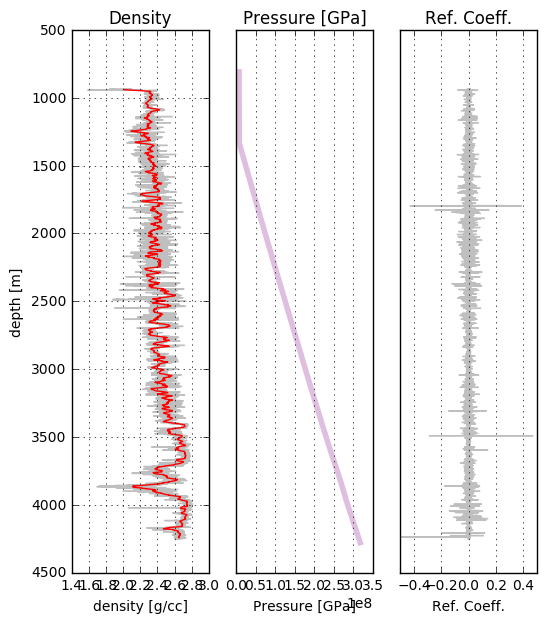

In [64]:
fig = plt.figure(figsize=(6,7))

# Density track
ax1 = fig.add_subplot(1,3,1)
ax1.plot(rhob, depth_m, 'k',alpha=0.25)
ax1.plot(smooth(rhob, 100), depth_m, 'r')
ax1.invert_yaxis()
ax1.set_ylabel('depth [m]')
ax1.set_xlabel('density [g/cc]')
ax1.set_title('Density')
ax1.grid()

# Pressure track
ax2 = fig.add_subplot(1,3,2)
ax2.plot(pressure, depth_m, 'purple',alpha=0.25,lw=4)
ax2.invert_yaxis()
ax2.set_xlabel('Pressure [GPa]')
ax2.set_title('Pressure [GPa]')
ax2.set_yticks([])
ax2.grid()

# Reflection coefficient track
ax3 = fig.add_subplot(1,3,3)
ax3.plot(rc, depth_m[:-1], 'k',alpha=0.25)
ax3.invert_yaxis()
ax3.set_xlabel('Ref. Coeff.')
ax3.set_title('Ref. Coeff.')
ax3.set_xlim(-0.5,0.5)
ax3.set_yticks([])
ax3.grid()

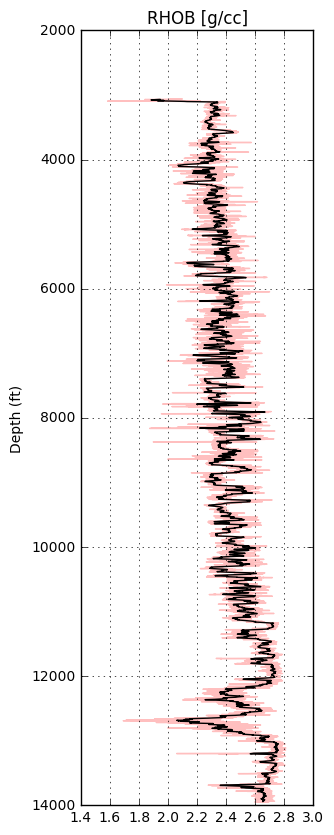

In [65]:
plt.figure(figsize=(3,10))
plt.plot(rhob, depth, 'r', alpha = 0.25)
plt.plot(smooth(rhob, 36), depth, 'k')
plt.gca().invert_yaxis()
plt.grid()
plt.title('RHOB [g/cc]')
plt.ylabel('Depth (ft)')

Bonus: compare these operations with list operations.

# Load and inspect a 2D seismic section from a Numpy binary file


Exercise:

* a) Use `np.loadtxt(...)` to load the text file named `../data/seismic_cube` into an numpy array called data. How much time did it take? (seconds) (import time) 

* b) How many dimensions does this data array have?

* c) How many elements does data have in each dimension?

* d) How much space does this object take up in memory?

In [66]:
import numpy as np

In [67]:
import time
start = time.time()
 
data = np.load('data/seismic_array.npy')
 
end = time.time()
elapsed = end - start
print("Time taken to read volume: {:.2f} seconds.".format(elapsed))


Time taken to read volume: 0.04 seconds.


# Some information about the seismic cube

* Number of inlines: 194
* Number of crosslines: 299
* Number of samples per trace: 463
* Sample rate in seconds: 0.004

In [70]:
x = data.shape[1] / 2
int(np.ceil(x))
int(np.floor(x))

231

In [71]:
nIL = 194   # number of inlines
nXL = 299   # number of crosslines
nt = 463    # number of samples per trace
dt = 0.004  # sample rate in seconds

In [72]:
data.shape

(58006, 463)

In [73]:
data.nbytes

53713556

<img src="images/SEGY_file_byte_stream_structure.png"></img>

SEGY data is often in a series of traces like this

<img src="images/SEGY_revisions.png"></img>

So we can manipulate a 2D `array` into a 3D array using numpy's `reshape` *method*.

In [74]:
data3d = data.reshape(nIL, nXL, nt)

In [75]:
data3d = data3d[:,:,:450]

In [76]:
np.save('data/data3d.npy', data3d)

----
<div class="alert alert-success">
    <b>Exercise</b>:
    <ul>
      <p> a) create a new object called `xline` find the middle trace on crossline 150
 <p> b)What are the dimensions of `xline`? </p>
 <p> c)Make a plot of xline using `plt.imshow(xline)` </p>
 <p> d)Pass an argument into the imshow function change the ugly default to your favourite colourbar! </p>
 <p> e)Is there anything funny / wrong / interesting about the line? Can you fix it? </p>
 <p> f)Use matplotlib.pyplot's `figure` function to make a figure object, (`fig = plt.figure()`) </p>

In [77]:
# Do part a) here
xline = data3d[:,150,:]
trace = xline[int(np.ceil(xline.shape[0]/2)),:]

In [78]:
# Do part b) here
xline.ndim

2

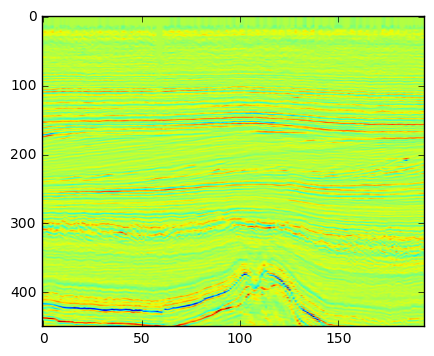

In [79]:
# Do part c) here
plt.imshow(xline.T, aspect=0.35)

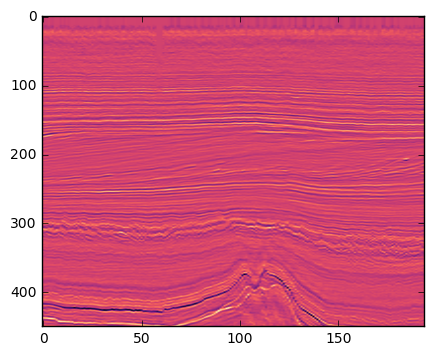

In [80]:
# Do part d) here
plt.imshow(xline.T, cmap='magma', aspect=0.35)

we need to rotate the line


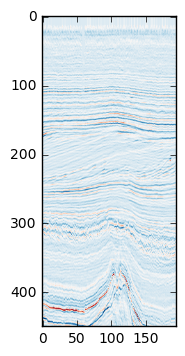

In [81]:
# Do part d) here
print('we need to rotate the line')
plt.imshow(xline.T, cmap='RdBu')

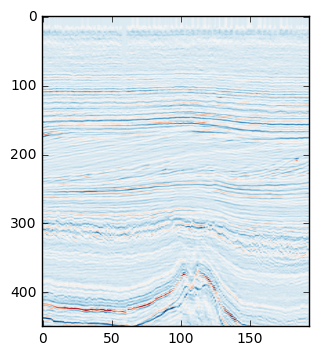

In [82]:
# Do part e) here
plt.imshow(xline.T, cmap='RdBu', aspect=0.5)

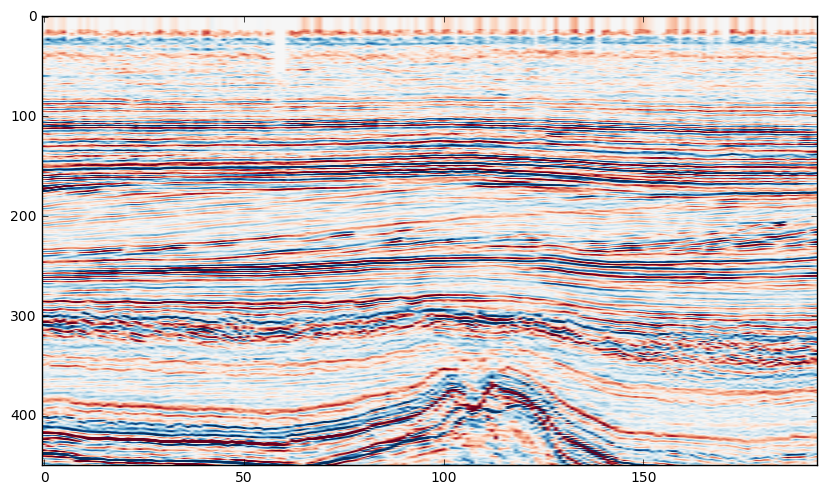

In [83]:
# Indexing into the cube, computing trace statistics.
plt.figure(figsize=(10,9))
plt.imshow(xline.T, cmap='RdBu', aspect=0.25, clim=[-0.5e4,0.5e4])

In [84]:
xline.shape[0]

194

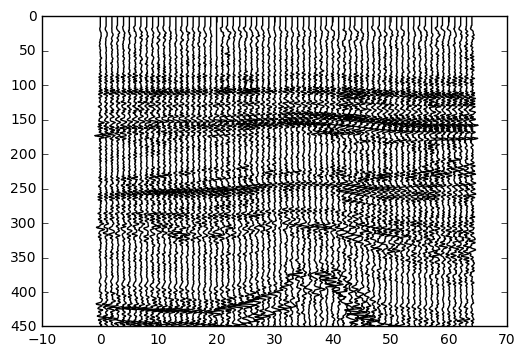

In [85]:
gain = 1
for i, trace in enumerate(xline[::3]):
    plt.plot(gain*i + gain*trace/np.amax(trace), np.arange(len(trace)),'k')
plt.gca().invert_yaxis()    

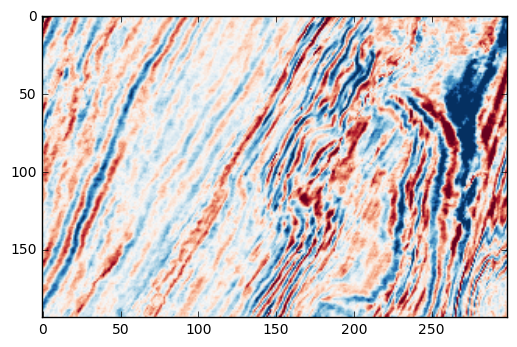

In [86]:

from ipywidgets import interact

@interact(t=(0, data3d.shape[-1]))
def f(t):
    #print('X is:', t)
    plt.imshow(data3d[:,:,t],'RdBu', clim=[-5000,5000])

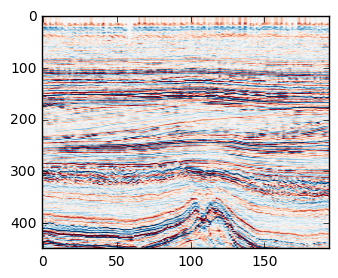

In [87]:
from ipywidgets import interact



@interact(xline=(0, data3d.shape[1]))
def f(xline):
    #print('X is:', t)
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data3d[:,xline,:].T,'RdBu', clim=[-5000,5000], aspect=0.35)

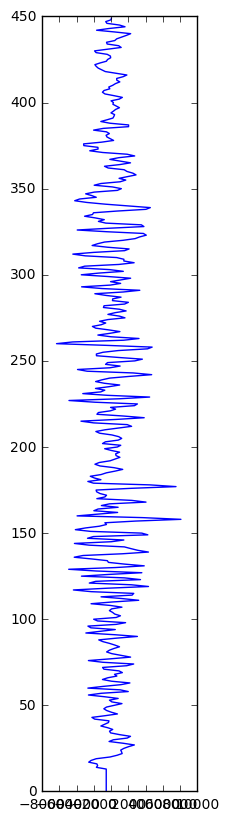

In [88]:
plt.figure(figsize=(2,10))
plt.plot(trace, np.arange(len(trace)))

----
<div class="alert alert-success">
    <b>Exercise</b>:
    <ul>
      <p> a) How many time samples are in this trace?
 <p> b) What is the range of peak to peak values of the trace? </p>
 <p> c) what is the maximum value along this trace? And where is it located? </p>
 <p> d) what is the minumum value along this trace? And where is it located? </p>
 <p> e) Seismic traces should have a mean value close to zero. Does this trace have an average value of zero? </p>

In [89]:
# Do part a) here
trace
trace.shape

(450,)

In [90]:
# Do part b) here
np.ptp(trace)

14444

In [91]:
# Do part c) here
np.amax(trace)
# Where is it located?
np.argwhere(trace == -46)

array([], shape=(0, 1), dtype=int64)

In [92]:
trace[156]

-716

In [93]:
# Do part d) here
np.amin(trace)
# Where is it located
np.argwhere(trace == np.amin(trace))
trace[390]

-462

In [94]:
# Do part e) here
np.mean(trace)/np.amax(trace)

-0.0026698444006136315

----
<div class="alert alert-success">
    <b>Exercise: Plot this seismic trace</b>:
    <ul> 
* make a "time axis": `np.arange(first_sample, last_sample, sample_rate)

* use matplotlib's `plt.plot` function (documentation!)

* other `plt` functions to check out: `plt.xlim`, `plt.title`, `plt.ylabel`, `plt.invert_yaxis()`, `plt.grid`

In [95]:
dt

0.004

In [96]:
twt = np.arange(0.0, len(trace))
twt *= dt

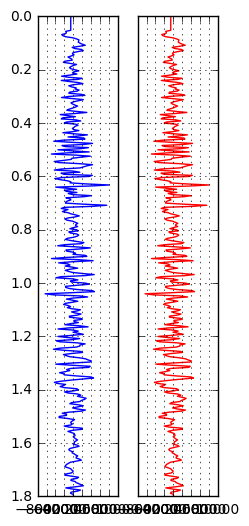

In [97]:
# Exercise goes here
trace_fig = plt.figure(figsize=(4,6))
ax = trace_fig.add_axes([0.1, 0.1, 0.2, 0.8])
ax.plot(trace,twt,'-')
ax.invert_yaxis()
ax.grid()

ax2 = trace_fig.add_axes([0.35, 0.1, 0.2, 0.8])
ax2.plot(trace,twt,'r-',)
ax2.invert_yaxis()
ax2.set_yticklabels([])
ax2.grid()

[SciPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_SciPy_Cheat_Sheet_Linear_Algebra.pdf)

[NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)


https://www.datacamp.com/community/blog/python-scipy-cheat-sheet#gs.yNuXbUw

<div class="alert alert-success">
    <b>Exercise: </b>
    <ul> 
    Load and visualize a seismic horizon


In [98]:
horizon_file = 'data/Penobscot_HorB.txt'
hrz = np.loadtxt(horizon_file)
# Do exercise here


# Trace statistics

<div class="alert alert-success">
    <b>Exercise: </b>
    <ul> 

* use the `plt.hist(s, bins)` function to create a histogram with 100 bins

* As suspected, most of the data values are close to zero, and fan outward (more or less symmetrically) to larger positive and negative values.

* To be sure, we can include the values from the entire line to build up better statitics. However, in order to pass a  2D array to the plt.hist function, we have to unravel it first,

In [99]:
xline.shape

(194, 450)

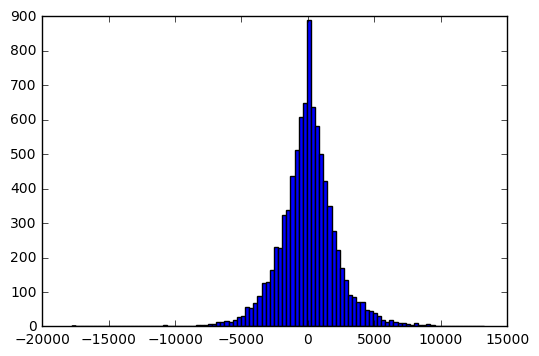

In [104]:
# Do here
histogram = plt.hist(xline[::10,:].flatten(), bins=100)

# SciPy

All the things that SciPy can do

https://docs.scipy.org/doc/scipy/reference/tutorial/

[Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)

# Trace Bandwidth

Let's look at the frequency content of this trace. To do this we will need to use the the fast fourier transform function from the Scipy FFT module. It helps to know that the sample rate of the trace is 0.04 s

<div class="alert alert-success">
    <b>Exercise: </b>
    <ul> a) Plot the power spectrum (frequency on the time axis). For bonus points, plot it on a log base 10 scale (Decibel)


In [105]:
s = trace

In [109]:
from scipy import fft
S = abs(fft(s))
faxis = abs(np.fft.fftfreq( len(s), d = dt))

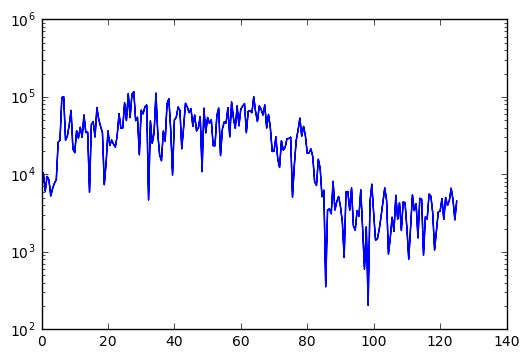

In [110]:
plt.plot(faxis,S)
plt.yscale('log')

<div class="alert alert-success">
    <b>Exercise: </b>
    <ul> b)  write a loop to plot the power spectrum all the traces


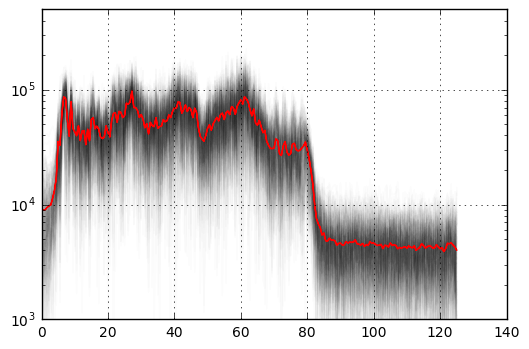

In [121]:
s_total=np.zeros(len(S))

for s in xline:

    S = abs(fft(s))
    faxis = abs(np.fft.fftfreq( len(s), d = dt))
    s_total+=S
    plt.plot(faxis,S,alpha=0.01,c='k')

s_total/=len(xline)
plt.plot(faxis,s_total,'r')
plt.yscale('log')
plt.ylim([1e3,0.5e6])
plt.grid()

<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>